In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # statistical data visualization
%matplotlib inline

In [16]:
data = 'car_evaluation.csv'

car_eval = pd.read_csv(data, header=None)

In [17]:
car_eval

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [18]:
car_eval.shape

(1728, 7)

In [29]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


car_eval.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [30]:
# let's again preview the dataset

car_eval.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [31]:
car_eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [32]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


for col in col_names:
    
    print(car_eval[col].value_counts())   

buying
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
maint
vhigh    432
high     432
med      432
low      432
Name: count, dtype: int64
doors
2        432
3        432
4        432
5more    432
Name: count, dtype: int64
persons
2       576
4       576
more    576
Name: count, dtype: int64
lug_boot
small    576
med      576
big      576
Name: count, dtype: int64
safety
low     576
med     576
high    576
Name: count, dtype: int64
class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [33]:
car_eval['class'].value_counts()

class
unacc    1210
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [35]:
# check missing values in variables

car_eval.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [36]:
#Declare feature vector and target variable
X = car_eval.drop(['class'], axis=1)

y = car_eval['class']

In [87]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [88]:
X_train.shape, X_test.shape

((1382, 6), (346, 6))

In [89]:
#Feature Engineering 

# check data types in X_train

X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [90]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,vhigh,vhigh,5more,more,big,high
901,med,vhigh,3,4,small,med
1709,low,low,5more,2,big,high
706,high,med,4,2,med,med
678,high,med,3,2,med,low


In [91]:
# import category encoders

import category_encoders as ce

encoder = ce.OrdinalEncoder(cols = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [92]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [93]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


In [94]:
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier 
rf = RandomForestClassifier(random_state=0)

# fit the model

rf.fit(X_train, y_train)

# Predict the Test set results
y_pred = rf.predict(X_test)

In [95]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9624


In [121]:
# instantiate the classifier with n_estimators = 50

rf_50 = RandomForestClassifier(n_estimators=50, random_state=0)

# fit the model to the training set
rf_50.fit(X_train, y_train)

# Predict on the test set results
y_pred_50 = rf_100.predict(X_test)

In [122]:
print('Model accuracy score with 50 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_50)))

Model accuracy score with 50 decision-trees : 0.9682


In [126]:
# create the classifier with n_estimators = 50

clf = RandomForestClassifier(n_estimators=50, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, random_state=0)

In [127]:
# view the feature scores

feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.292820
persons     0.226844
buying      0.173190
maint       0.149705
lug_boot    0.093287
doors       0.064154
dtype: float64

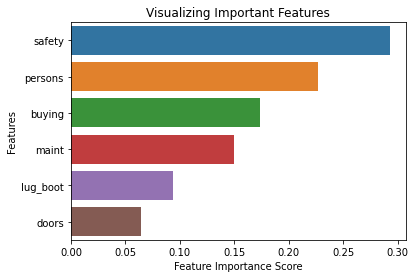

In [128]:
# Creating a seaborn bar plot

sns.barplot(x=feature_scores, y=feature_scores.index)


plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

In [129]:
#Now, I will drop the least important feature doors from the model, rebuild the model and check its effect on accuracy.

# declare feature vector and target variable

X = car_eval.drop(['class', 'doors'], axis=1)

y = car_eval['class']

In [130]:
# split data into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [132]:
# encode categorical variables with ordinal encoding

encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [137]:
# create the classifier with n_estimators = 50

clf = RandomForestClassifier(n_estimators=50, random_state=0)

# fit the model to the training set

clf.fit(X_train, y_train)

# predict the test model

y_pred = clf.predict(X_test)


In [138]:
# Check accuracy score 

print('Model accuracy score with class and doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with class and doors variable removed : 0.9364


Confusion matrix

 [[ 67  11   3   2]
 [  0   9   0   2]
 [  1   0 234   0]
 [  2   1   0  14]]


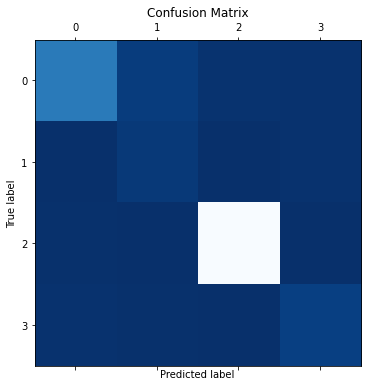

In [148]:
# Print the Confusion Matrix 
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6,6))
ax.matshow(cm, cmap=plt.cm.Blues_r)
ax.set_ylabel('True label')
ax.set_xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()